In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram
import scipy.constants as c
from mcerp import N, umath, Gamma

# Faraday Analysis Example

In [5]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [7]:
B0fn="13-May-2015 16_39_56_1355463638_fliplr.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638_fliplr.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn)
s=s0513_15_pol

In [8]:
s.register()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [16]:
s.pickle_transform('s0513_16 faraday registration.txt')

In [10]:
s.convert_to_alpha()

<IPython.core.display.Javascript object>


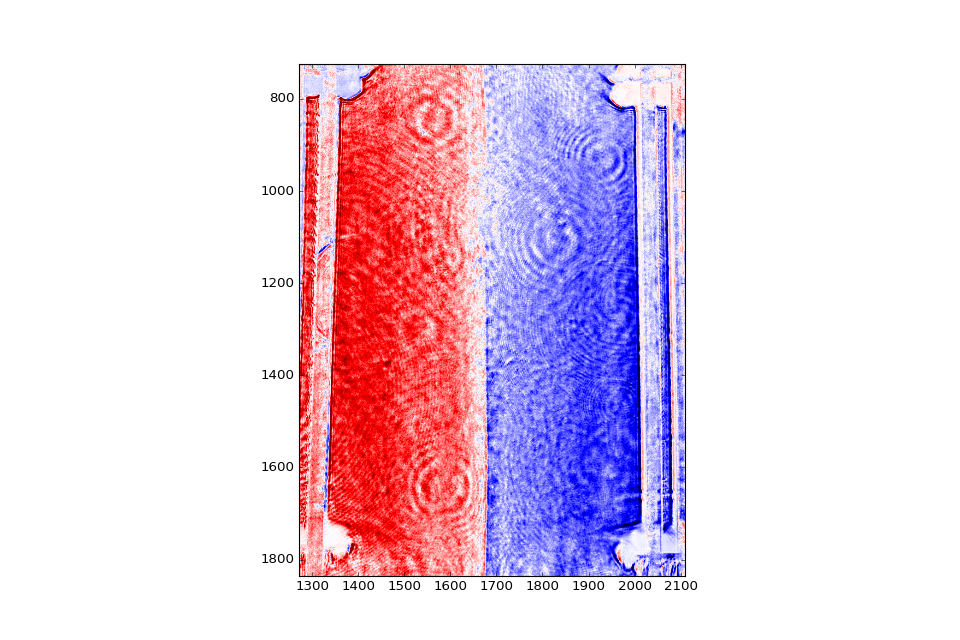

In [15]:
s.plot_data_px(clim=[-1,1])

<IPython.core.display.Javascript object>


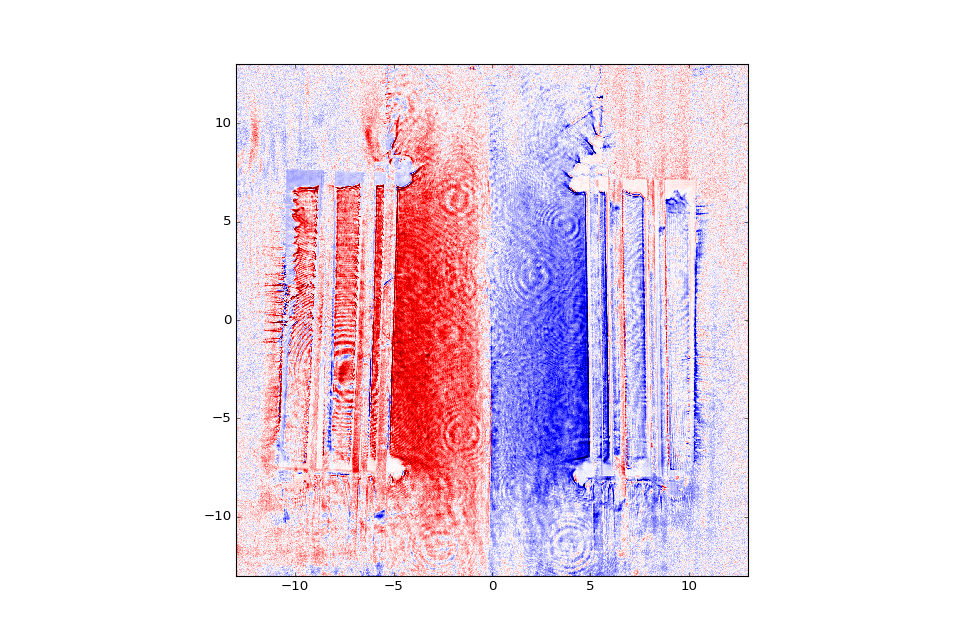

In [71]:
s.scale=67
s.set_origin([1255,1682], extent=[-13,13,-13,13])
s.plot_data_mm(clim=[-1,1])

In [145]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [57]:
s0513_15_far=FaradayMap2(s0513_15_pol,"s0513_15 IR side on image registration flipud.jpg", "s0513_15 neL side on.txt")

In [137]:
f=s0513_15_far
f.register(constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,400)})

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


<IPython.core.display.Javascript object>


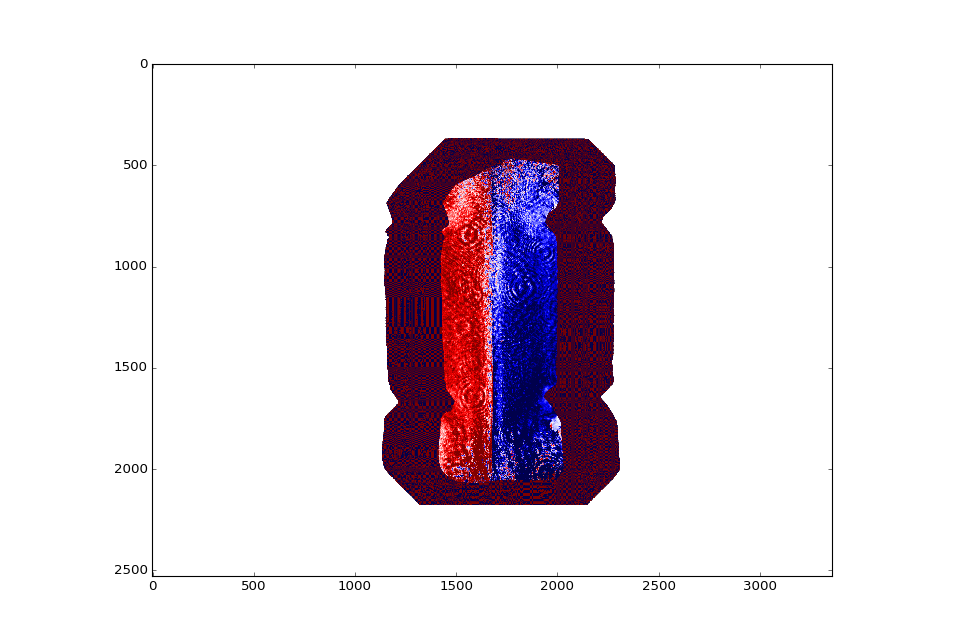

In [138]:
f.plot_data_px(clim=[-3,3])

In [68]:
f.transform

{'angle': -0.0004517333136675461,
 'scale': 0.71287100417764904,
 'tvec': array([ 10.08143623,  28.92796871])}

<IPython.core.display.Javascript object>


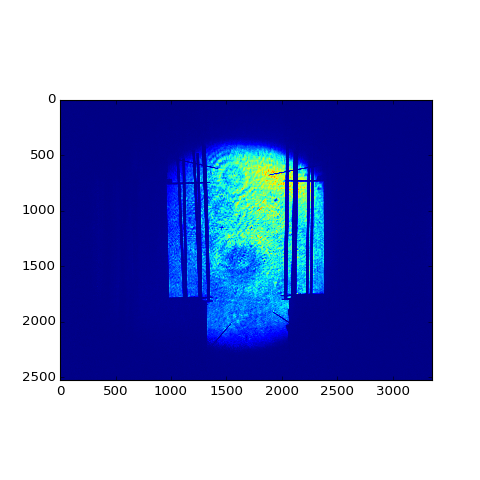

In [67]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(np.flipud(f.pm.B0))

In [72]:
f.scale=s.scale
f.set_origin(s.origin, extent=[-13,13,-13,13])

<IPython.core.display.Javascript object>


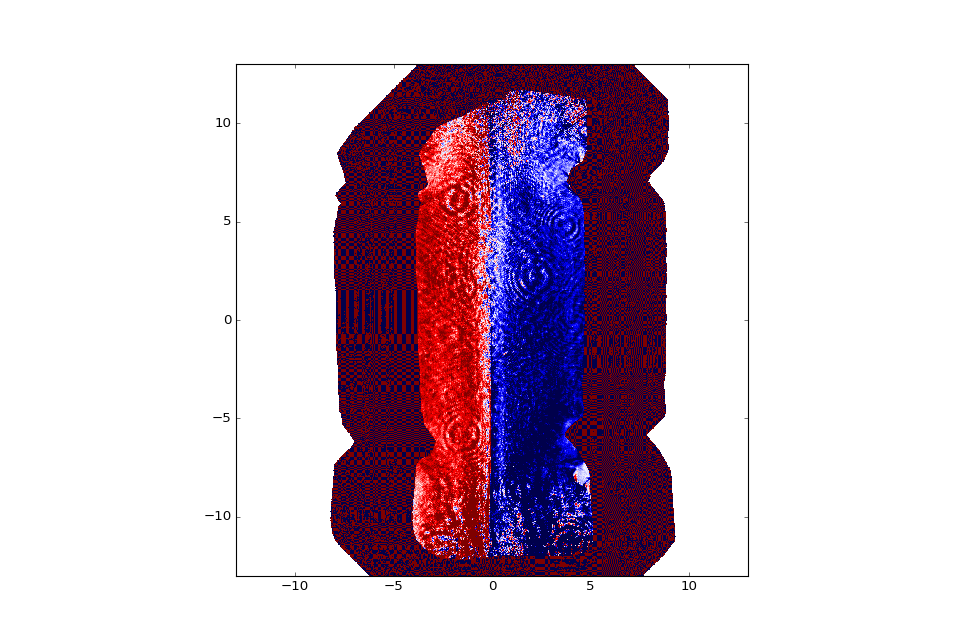

In [73]:
f.plot_data_mm(clim=[-3,3])

In [78]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\thesis\images\chapter2 embedded images"

C:\Users\jdavies\Google Drive\MAGPIE\thesis\images\chapter2 embedded images


In [143]:
fig.savefig('s0513_16 Bfield.png', dpi=300, bbox_inches='tight')

# 12 Frame Images

In [159]:
from magpie_data import OpticalFrames

## s1214_15

In [231]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted


In [232]:
s=OpticalFrames(168,20)
s.logarithm()
s.rotate(-90+56)
#s.plot_rot(frame=2)
s.crop((512,608), xcrop=230, ycrop=300)
#s.plot_crop()

C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


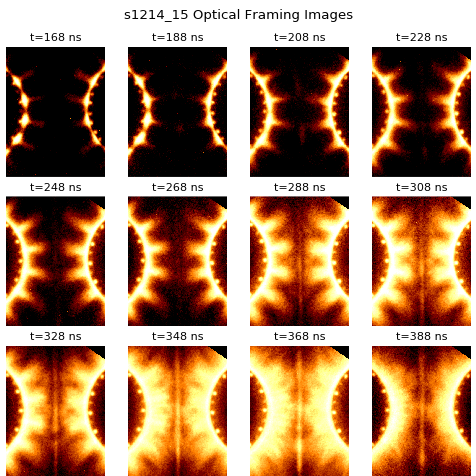

In [233]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.1,0.9], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)
#fig.tight_layout()

In [234]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## s0120B16

In [212]:
cd "~\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16


In [213]:
s=OpticalFrames(188,15)
s.logarithm()
s.rotate(-90+25)
#s.plot_rot(frame=2)
s.crop((634,597), xcrop=230, ycrop=300)
#s.plot_crop()

C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


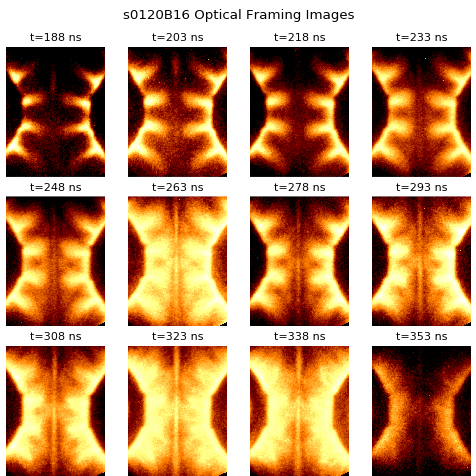

In [227]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.2,1.0], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)
#fig.tight_layout()

In [230]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## s0120_16

In [236]:
cd "~\Google Drive\MAGPIE\data\2016\s0120_16 C RECONNECTION 12 FRAME\s0120_16"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120_16 C RECONNECTION 12 FRAME\s0120_16


In [237]:
s=OpticalFrames(145,15)
s.logarithm()
s.rotate(-90+22.5)
s.crop((614,563), xcrop=230, ycrop=300)


C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


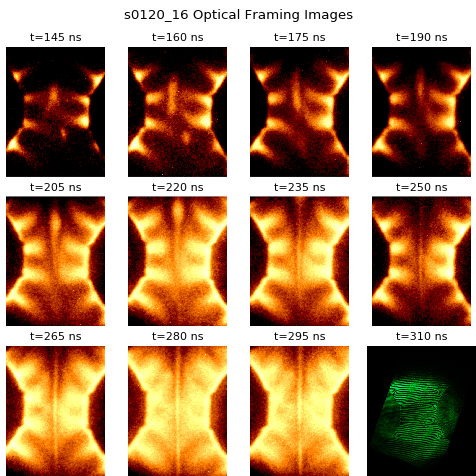

In [238]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.2,1.0], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)

In [239]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Interferometry
w, h=151.3, 235 mm = 5.96, 9.25 inches

## s0119_16 (NOT USED)

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0119_16 C RECONNECTION 12 FRAME"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0119_16 C RECONNECTION 12 FRAME


In [3]:
rot=-90-20
s0119_16_532=NeLMap2('s0119_16 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0119_16_532
title='s0119_16, t=171ns'
s.data=s.data-3e17
s.set_origin(origin=[2906,2182], extent=[-11.5,11.5,-8,8])

In [4]:
i=Interferogram('s0119_16 532nm end on interferometry (4).JPG', rot_angle=rot, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


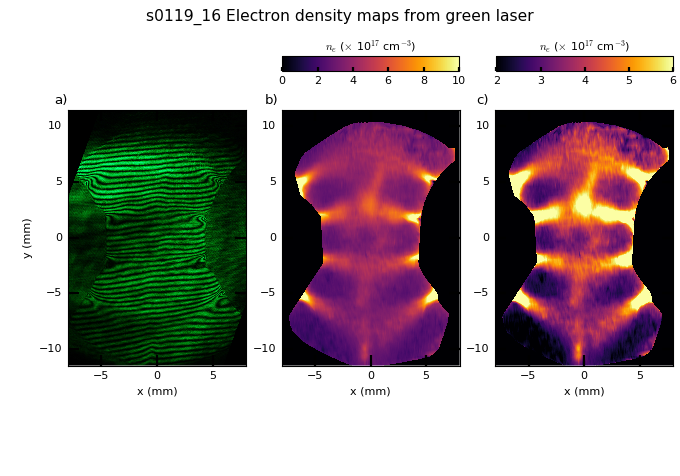

In [72]:
fig, ax=plt.subplots(1,3, figsize=(8.5,5.96))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,10], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.85, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,2,4,6,8,10], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[2,6], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.85, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[2,3,4,5,6], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+' Electron density maps from green laser', fontsize=14)

fig.text(s='a)', x=0.08, y=0.78, fontsize=12)
fig.text(s='b)', x=0.39, y=0.78, fontsize=12)
fig.text(s='c)', x=0.7, y=0.78, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)

#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=2)

In [74]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s0612_15

In [73]:
cd "~\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS


In [74]:
rot=-90
s0612_15_532=NeLMap2('s0612_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0612_15_532
s.set_origin(origin=(2430,1450), extent=[-11.5,11.5,-8,8])

In [75]:
i=Interferogram('s0612_15 532nm end on interferometry (2).JPG', rot_angle=rot, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


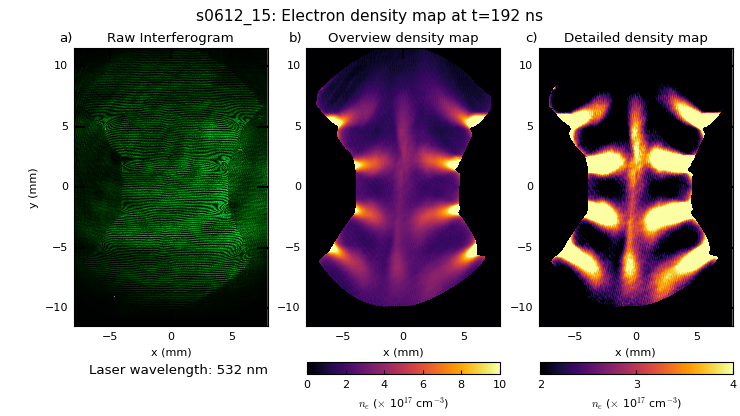

In [76]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,10], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,2,4,6,8,10], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[2,4], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[2,3,4], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=192 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 532 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    #c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=1)
    #c.xaxis.tick_top()

In [77]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s1006_15 532 nm

In [78]:
cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [79]:
rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

In [80]:
i=Interferogram('s1006_15 532nm end on interferometry (2).JPG', rot_angle=rot, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


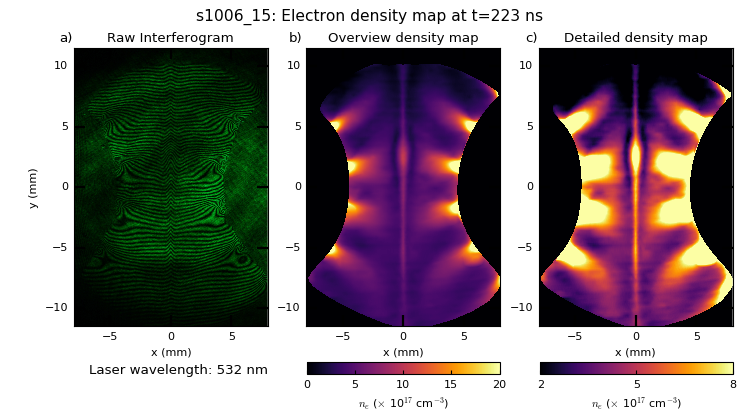

In [81]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,20], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15,20], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[2,8], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[2,5,8], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=223 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 532 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    #c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=1)
    #c.xaxis.tick_top()

In [82]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s1006_15 355 nm

In [83]:
cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [84]:
rot=-90
s1006_15_355=NeLMap2('s1006_15 355nm neL.txt', scale=128, rot_angle=rot, multiply_by=2/1.6, flip_lr=True)
s=s1006_15_355
s.set_origin(origin=(1618,1110), extent=[-11.5,11.5,-8,8])

In [85]:
i=Interferogram('s1006_15 355 nm end on interferometry (2).JPG', rot_angle=rot, scale=s.scale, flip_lr=True)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


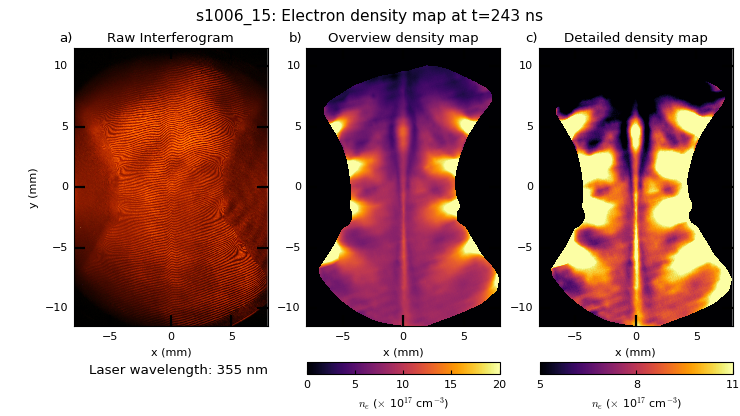

In [86]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,20], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15,20], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[5,11], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[5,8,11], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=243 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 355 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    #c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=1)
    #c.xaxis.tick_top()

In [87]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_355nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s1026_15 532 nm

In [88]:
cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [89]:
s1026_15_532=NeLMap2('s1026_15 532nm neL.txt', scale=173, rot_angle=-90, multiply_by=1/1.6)
s1026_15_532.set_origin(origin=(2377,1438), extent=[-11.5,11.5,-8,8])
s=s1026_15_532

In [90]:
i=Interferogram('s1026_15 532nm end on interferometry (1).JPG', rot_angle=-90, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


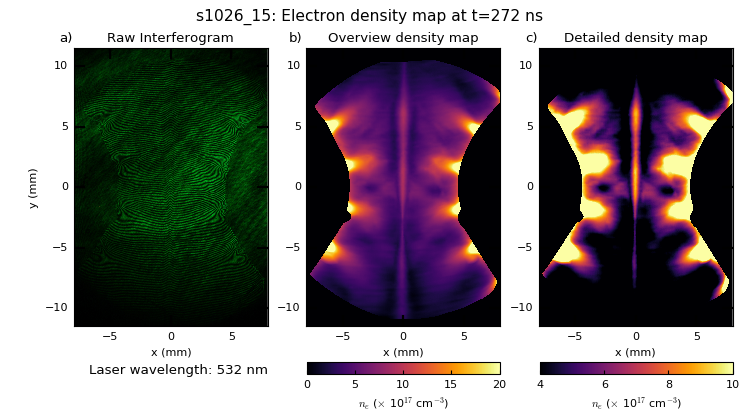

In [91]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,20], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15,20], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[4,10], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[4,6,8,10], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=272 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 532 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    #c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=1)
    #c.xaxis.tick_top()

In [92]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s1026_15 355 nm

In [3]:
cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [11]:
s1026_15_355=NeLMap2('s1026_15 355nm neL.txt', scale=128, multiply_by=2/1.6, rot_angle=-90, flip_lr=True)
s1026_15_355.set_origin(origin=(1540,1110), extent=[-11.5,11.5,-8,8])
s=s1026_15_355

In [12]:
i=Interferogram('s1026_15 355 nm end on interferoemtry (2).JPG', rot_angle=-90, scale=s.scale, flip_lr=True)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


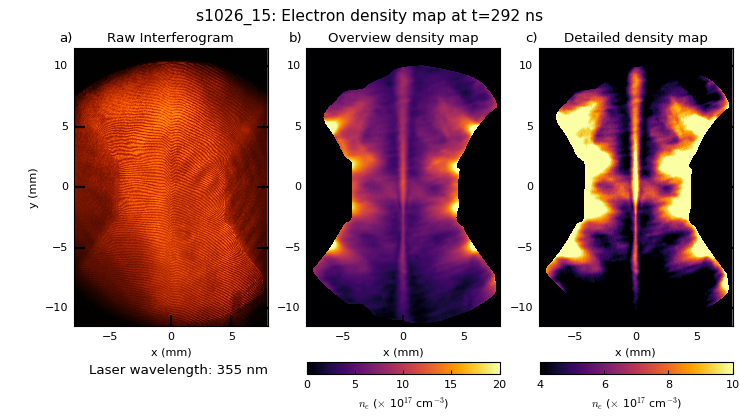

In [14]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,20], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15,20], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[4,10], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[4,6,8,10], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=292 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 355 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    #c.xaxis.set_label_position('top')
    c.tick_params(labelsize=10, pad=5, length=4, width=1)
    #c.xaxis.tick_top()

In [17]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_355nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s0429_16 532nm

In [121]:
cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS


In [122]:
s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5)
s=s0429_16_532
s.set_origin(origin=(2850,2348), extent=[-11.5,11.5,-8,8])

In [123]:
i=Interferogram('s0429_16 532nm end on interferometry (1).JPG', rot_angle=-90+22.5, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


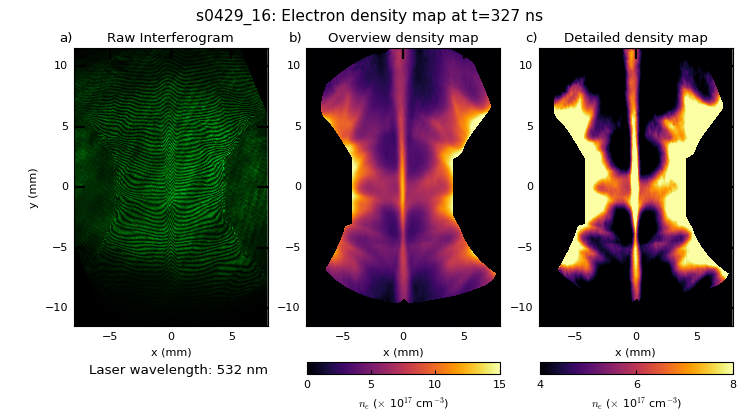

In [124]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,15], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[4,8], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[4,6,8], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=327 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 532 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    c.tick_params(labelsize=10, pad=5, length=4, width=1)    

In [99]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s0429_16 355 nm

In [100]:
cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS


In [101]:
s0429_16_355=NeLMap2('s0429_16 355nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5, flip_lr=True)
s=s0429_16_355
s.set_origin(origin=(2711,2268), extent=[-11.5,11.5,-8,8])

In [102]:
i=Interferogram('s0429_16 355nm end on interferometry (1).JPG', rot_angle=-90+22.5, scale=s.scale, flip_lr=True)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


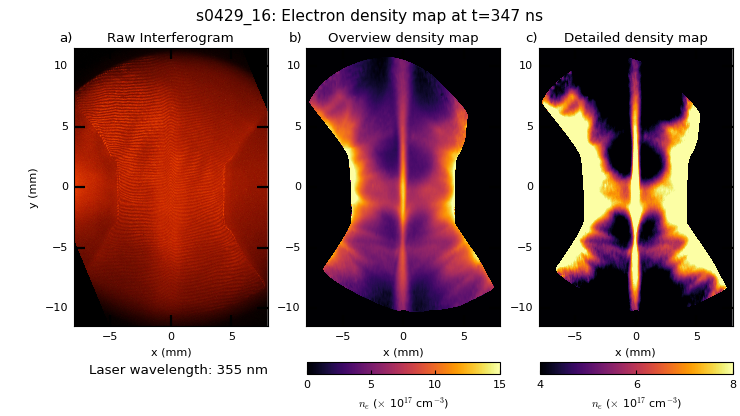

In [107]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,15], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,5,10,15], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[4,8], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[4,6,8], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=347 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 355 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    c.tick_params(labelsize=10, pad=5, length=4, width=1)    

In [108]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_355nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## s0830_16 532 nm

In [109]:
%cd "~\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday


In [110]:
s0830_16_532=NeLMap2('s0830_16 532nm neL.txt', scale=173, rot_angle=-90+1.3, multiply_by=1/1.6)

In [111]:
s=s0830_16_532
s.set_origin(origin=(2250,1554),extent=[-11.5,11.5,-8,8])

In [112]:
i=Interferogram('s0830_16 532nm interferometry (2).JPG', rot_angle=-90+1.3, scale=s.scale)
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


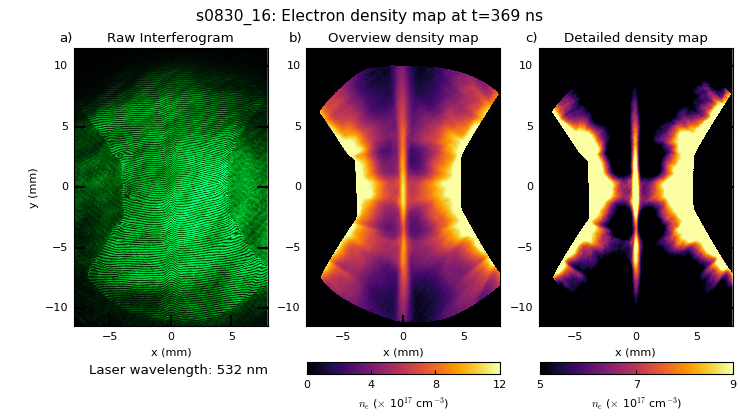

In [119]:
fig, ax=plt.subplots(1,3, figsize=(9.25,5.2))

# raw interferogram

i.plot_data_mm(ax=ax[0])

#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,12], multiply_by=1e-17, ax=ax[1])

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,4,8,12], orientation='horizontal')

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[5,9], multiply_by=1e-17, ax=ax[2])

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.1, 0.26, 0.03])#l,b,w,h
fig.colorbar(ne2, cax=cbar_ax2, ticks=[5,7,9], orientation='horizontal')

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+': Electron density map at t=369 ns', fontsize=14)

fig.text(s='a)', x=0.08, y=0.9, fontsize=12)
fig.text(s='b)', x=0.39, y=0.9, fontsize=12)
fig.text(s='c)', x=0.71, y=0.9, fontsize=12)

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=10, width=2)
ax[0].set_ylabel('y (mm)',fontsize=10)
ax[0].set_title('Raw Interferogram', fontsize=12)
ax[1].set_title('Overview density map', fontsize=12)
ax[2].set_title('Detailed density map', fontsize=12)

fig.text(s='Laser wavelength: 532 nm', x=0.12, y=0.1, fontsize=12)


#colour bars
for c in [cbar_ax1, cbar_ax2]:
    c.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
    c.tick_params(labelsize=10, pad=5, length=4, width=1)    

In [120]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.fn+'_532nm.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)

## Ion skin depths

In [6]:
import scipy.constants as cons
shots=[s0612_15_532, s1006_15_532, s1006_15_355, s1026_15_532, s1026_15_355, s0429_16_532, s0429_16_355, s0830_16_532]
n_e=np.array([ss.data_c[ss.mm_to_px((0,0))] for ss in shots])
t=[192,223,243,272,292,327,347,369]

NameError: name 's0612_15_532' is not defined

In [ ]:
A=12
Z=6
n_i=n_e/6
om_pi=1.32e3*Z*A**-0.5*n_i**0.5
d_i=3e10/om_pi

<IPython.core.display.Javascript object>


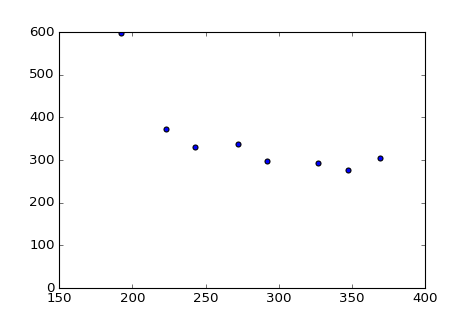

(0, 600)

In [150]:
fig, ax=plt.subplots(figsize=(150e-3/cons.inch, 4))
ax.scatter(t, d_i*1e4)
ax.set_ylim([0,600])

## Rogowskis

In [1]:
from bdots import *
shots=['s0612_15', 's1006_15', 's1026_15', 's0429_16', 's0830_16']

<IPython.core.display.Javascript object>


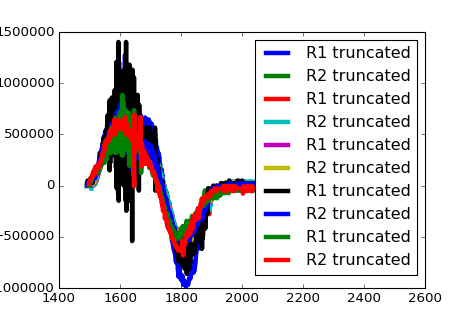

s0612_15: using both Rogs
s1006_15: using both Rogs
s1026_15: using both Rogs
s0429_16: using both Rogs
s0830_16: using both Rogs


In [11]:
fig, ax=plt.subplots(figsize=(15/2.54, 4))
for ss in shots:
    r=Rogowskis(ss)
    r.truncate(threshold=1.0,cal=[105*3e9,-103*3e9])
    r.integrate(return_posts=8)
    r.plot("tr", scale=1e-6, ax=ax)

In [12]:
m=MitlBdots(shots[0])

In [14]:
m.mbds[0].data

array([-0.375, -0.375, -0.375, ..., -0.375, -0.375, -6.75 ])

<IPython.core.display.Javascript object>


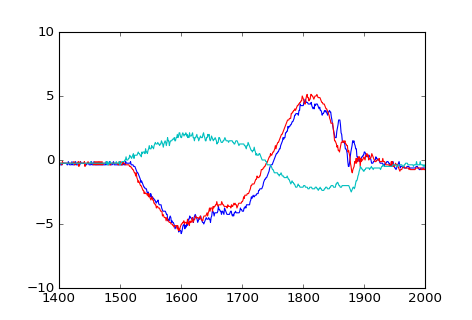

(-10, 10)

In [29]:
shots=['s0612_15', 's1006_15', 's1026_15', 's0429_16','s0830A16']
m={}
for s in shots:
    m[s}=MitlBdots(s)

fig, ax=plt.subplots(figsize=(15/2.54, 4))
for ss in shots:
    m=MitlBdots(ss)
    ax.plot(m.mbds[0].time, m.mbds[0].data)
    
ax.set_xlim([1400,2000])
ax.set_ylim([-10,10])


In [2]:
mm=MitlBdots('s0830A16')

In [3]:
mm.mbds[3].time

array([-3429.46, -3428.46, -3427.46, ...,  4567.54,  4568.54,  4569.54])

In [23]:
shots=['s0612_15', 's1006_15', 's1026_15', 's0429_16','s0830A16']
m={}
for s in shots:
    m[s]=MitlBdots(s)

<IPython.core.display.Javascript object>


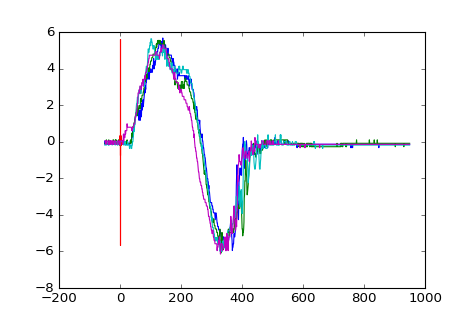

C:\Users\jdavies\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\jdavies\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
fig, ax=plt.subplots(figsize=(15/2.54, 4))
i=3
for mm in m:
    d=m[mm]
    d.truncate()
    ax.plot(d.mbds[i].time_tr0, d.mbds[i].data_tr)
    
#ax.set_xlim([1400,2000])
#ax.set_ylim([-10,10])

In [9]:
m

{'s0429_16': <bdots.MitlBdots at 0x81aee80>,
 's0612_15': <bdots.MitlBdots at 0x81ae668>,
 's0830A16': <bdots.MitlBdots at 0x81f5588>,
 's1006_15': <bdots.MitlBdots at 0x81ae6a0>,
 's1026_15': <bdots.MitlBdots at 0x81aec18>}